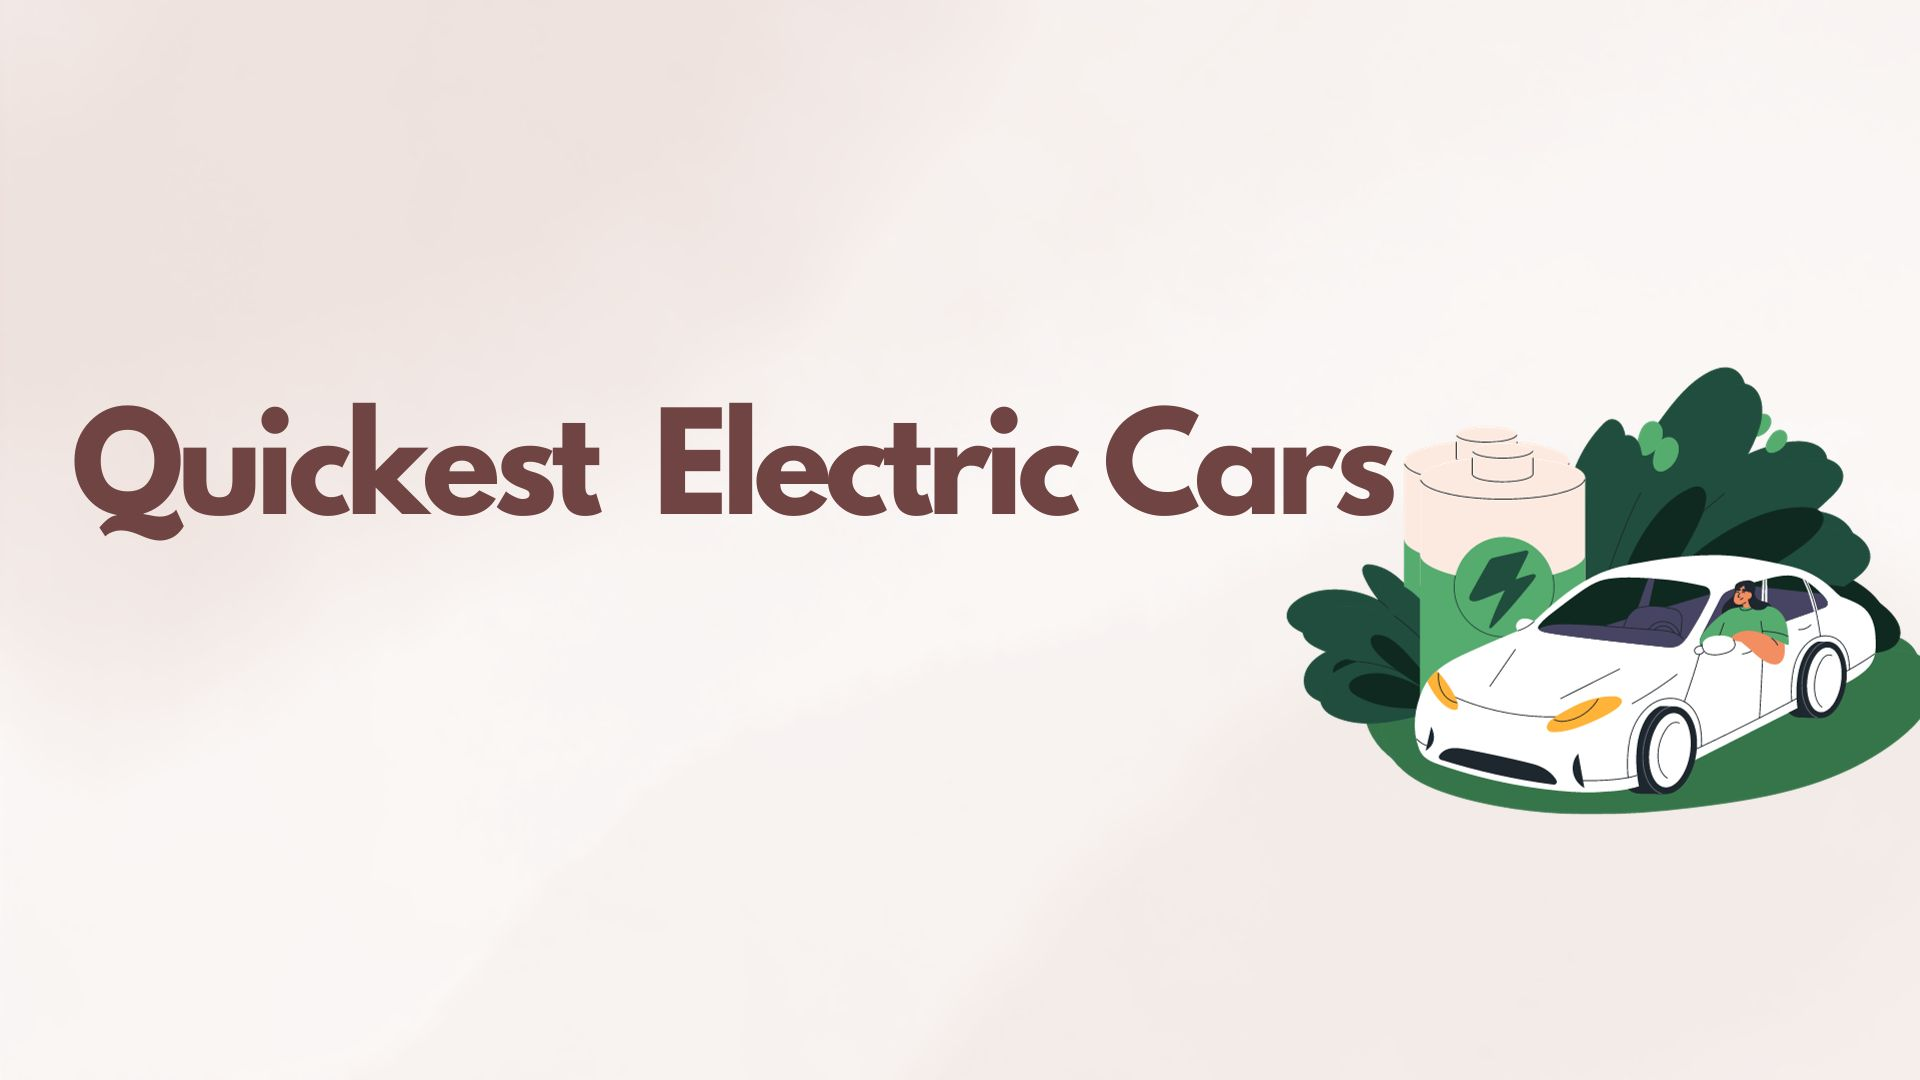

In [83]:
from IPython.display import Image
Image(filename='back.jpg') 

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

evdata = pd.read_csv("EVData.csv")
evdata.head()

,Name,Subtitle,Acceleration,TopSpeed,Range,Efficiency,FastChargeSpeed,Drive,NumberofSeats,PriceinGermany,PriceinUK
0,Tesla Roadster,Battery Electric Vehicle | 200 kWh,2.1 sec,410 km/h,970 km,206 Wh/km,920 km/h,All Wheel Drive,4,"€215,000","£189,000"
1,Tesla Model X Plaid,Battery Electric Vehicle | 90 kWh,2.6 sec,262 km/h,455 km,198 Wh/km,680 km/h,All Wheel Drive,7,"€116,990","£110,980"
2,Porsche Taycan Turbo S,Battery Electric Vehicle | 83.7 kWh,2.8 sec,260 km/h,390 km,215 Wh/km,860 km/h,All Wheel Drive,4,"€186,336","£138,830"
3,Porsche Taycan Turbo S Cross Turismo,Battery Electric Vehicle | 83.7 kWh,2.9 sec,250 km/h,380 km,220 Wh/km,790 km/h,All Wheel Drive,4,"€187,746","£139,910"
4,Tesla Cybertruck Tri Motor,Battery Electric Vehicle | 200 kWh,3.0 sec,210 km/h,750 km,267 Wh/km,710 km/h,All Wheel Drive,7,"€75,000","£68,000"


### Dataset Variebles

**Name**: Contains the name of the electric vehicle (EV), data type: *string*  
**Subtitle**: Contains details about the vehicle type and battery capacity, data type: *string*  
**Acceleration**: Contains the vehicle's acceleration time (0 to a specified speed), data type: *string*    
**Top Speed**: Contains the maximum speed the vehicle can reach, data type: *string*   
**Range**: Contains the maximum distance the vehicle can travel on a single charge, data type: *string*  
**Efficiency**: Contains the energy consumption of the vehicle, data type: *string*  
**Fast Charge Speed**: Contains the speed of fast charging in terms of range added per hour, data type: *string*  
**Drive**: Contains the type of drivetrain of the vehicle, data type: *string*  
**Number of Seats**: Contains the seating capacity of the vehicle, data type: *integer*   
**Price in Germany**: Contains the retail price of the vehicle in Germany, data type: *string*  
**Price in UK**: Contains the retail price of the vehicle in the United Kingdom, data type: *string*

In [85]:
print((evdata[['PriceinGermany','Range', 'TopSpeed','Acceleration']].dtypes))

PriceinGermany    object
Range             object
TopSpeed          object
Acceleration      object
dtype: object


When analyzing a database, the Pandas library is used, which automatically determines the data type of each column in a DataFrame based on its content. However, changing the data type of the columns listed below can help speed up data processing, fix errors, and bring the data into the desired format for analysis.

### Data preparation

**1**: Removing characters from string values  
**2**: Processing of invalid data  
**3**: Replacement of missing values  
**4**: Data Type Conversion  
**5**: Replacing null values  
**6**: Checking for null values  

In [86]:
evdata['PriceinGermany'] = evdata['PriceinGermany'].str.replace('€', '')
evdata['Range'] = evdata['Range'].str.replace('km', '')
evdata['TopSpeed'] = evdata['TopSpeed'].str.replace(' km/h', '')
evdata['Acceleration'] = evdata['Acceleration'].str.replace(' sec', '')
evdata['FastChargeSpeed'] = evdata['FastChargeSpeed'].str.replace('km/h', '')

In [87]:
evdata['PriceinGermany'] = evdata['PriceinGermany'].str.replace(',', '.')


In [88]:
invalid_data = evdata[evdata['FastChargeSpeed'] == '-']
invalid_data


,Name,Subtitle,Acceleration,TopSpeed,Range,Efficiency,FastChargeSpeed,Drive,NumberofSeats,PriceinGermany,PriceinUK
146,Smart EQ fortwo coupe,Battery Electric Vehicle | 16.7 kWh,11.6,130,100,167 Wh/km,-,Rear Wheel Drive,2,18.460,"£19,200"
150,Smart EQ fortwo cabrio,Battery Electric Vehicle | 16.7 kWh,11.9,130,95,176 Wh/km,-,Rear Wheel Drive,2,21.720,"£21,620"
164,Renault Twingo Electric,Battery Electric Vehicle | 21.3 kWh,12.6,135,130,164 Wh/km,-,Rear Wheel Drive,4,24.790,NaN
165,Smart EQ forfour,Battery Electric Vehicle | 16.7 kWh,12.7,130,95,176 Wh/km,-,Rear Wheel Drive,4,19.120,"£19,795"
178,Renault Kangoo Maxi ZE 33,Battery Electric Vehicle | 31 kWh,22.4,130,160,194 Wh/km,-,Front Wheel Drive,5,NaN,"£31,680"


In [89]:
len(invalid_data)

5

In [90]:

evdata['FastChargeSpeed'] = evdata['FastChargeSpeed'].replace('-', float('nan'))

evdata['FastChargeSpeed'] = evdata['FastChargeSpeed'].fillna(0)

evdata['FastChargeSpeed'] = evdata['FastChargeSpeed'].astype('int64')

mean_value = evdata['FastChargeSpeed'].mean()
evdata['FastChargeSpeed'] = evdata['FastChargeSpeed'].replace(0, mean_value)


In [91]:
evdata['PriceinGermany'] = evdata['PriceinGermany'].astype(float)
evdata['Range'] = evdata['Range'].astype(int)
evdata['TopSpeed'] = evdata['TopSpeed'].astype(int)
evdata['Acceleration'] = evdata['Acceleration'].astype(float)

In [92]:
print((evdata[['PriceinGermany','Range', 'TopSpeed','Acceleration','FastChargeSpeed']].dtypes))

PriceinGermany     float64
Range                int64
TopSpeed             int64
Acceleration       float64
FastChargeSpeed    float64
dtype: object


In [93]:
evdata['PriceinGermany'].isnull().sum()
evdata['Range'].isnull().sum()
evdata['TopSpeed'].isnull().sum()
evdata['Acceleration'].isnull().sum()
evdata['FastChargeSpeed'].isnull().sum()

0

In [94]:
median_value = evdata['PriceinGermany'].mean()
evdata['PriceinGermany'] = evdata['PriceinGermany'].fillna(median_value)

In [95]:
columns_to_check = ['PriceinGermany', 'Range', 'Acceleration', 'TopSpeed']

for i in columns_to_check:
    if (evdata[i] == 0).any():
        print(f"There are values equal to 0 in '{i}'")
    else:
        print(f"There are no values equal to 0 in '{i}'")


There are no values equal to 0 in 'PriceinGermany'
There are no values equal to 0 in 'Range'
There are no values equal to 0 in 'Acceleration'
There are no values equal to 0 in 'TopSpeed'


In [96]:
num_car_groups = len(evdata["Name"].value_counts())

evdata['Manufacturer'] = evdata['Name'].str.split().str[0]

grouped_cars = evdata.groupby('Manufacturer')['Name'].agg(list)

print(f'There are {num_car_groups} cars groups in the dataset.\n'
      f'They are: {grouped_cars}')

There are 173 cars groups in the dataset.
They are: Manufacturer
Aiways                                             [Aiways U5 ]
Audi          [Audi e-tron GT RS, Audi e-tron GT quattro, Au...
BMW           [BMW i4 M50, BMW iX xDrive50, BMW i4 eDrive40,...
Byton         [Byton M-Byte 95 kWh 4WD, Byton M-Byte 72 kWh ...
CUPRA         [CUPRA Born 170 kW - 62 kWh, CUPRA Born 170 kW...
Citroen       [Citroen e-C4 , Citroen e-SpaceTourer XS 50 kW...
DS                                     [DS 3 Crossback E-Tense]
Dacia                                   [Dacia Spring Electric]
Fiat          [Fiat 500e Hatchback 42 kWh, Fiat 500e 3+1, Fi...
Ford          [Ford Mustang Mach-E GT, Ford Mustang Mach-E E...
Honda                               [Honda e Advance, Honda e ]
Hyundai       [Hyundai IONIQ 5 Project 45, Hyundai IONIQ 5 L...
JAC                                                [JAC iEV7s ]
Jaguar                                    [Jaguar I-Pace EV400]
Kia           [Kia EV6 GT, Kia EV6 Long

In [97]:
evdata.describe()

,Acceleration,TopSpeed,Range,FastChargeSpeed,NumberofSeats,PriceinGermany
count,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000
mean,7.886592,175.586592,336.284916,479.051216,5.167598,58.316617
std,3.148790,40.770901,118.120926,238.812773,0.974311,31.275843
min,2.100000,123.000000,95.000000,120.000000,2.000000,18.460000
25%,5.600000,150.000000,257.500000,290.000000,5.000000,38.650000
50%,7.500000,160.000000,340.000000,440.000000,5.000000,52.500000
75%,9.650000,200.000000,400.000000,580.000000,5.000000,62.025000
max,22.400000,410.000000,970.000000,1410.000000,7.000000,215.000000


In [98]:
min_acc_index = evdata['Acceleration'].idxmin()
car_with_min_acc = evdata.loc[min_acc_index, 'Name']


max_acc_index = evdata['Acceleration'].idxmax()
car_with_max_acc = evdata.loc[max_acc_index, 'Name']

print(f'The quickest acceleration recorded is 2.1 seconds. Car with the maximum acceleration: {car_with_min_acc}')
print(f'The slowest acceleration is 22.4 seconds. Car with the minimum acceleration: {car_with_max_acc}')

The quickest acceleration recorded is 2.1 seconds. Car with the maximum acceleration: Tesla Roadster 
The slowest acceleration is 22.4 seconds. Car with the minimum acceleration: Renault Kangoo Maxi ZE 33


In [99]:
top_10 = evdata.sort_values(by='Acceleration', ascending=False).head()
bottom_10 = evdata.sort_values(by='Acceleration', ascending=True).head()


print("Top 10 cars with the maximum acceleration:")
print(top_10[['Name', 'Acceleration']])

print("\nTop 10 carswith the minimum acceleration:")
print(bottom_10[['Name', 'Acceleration']])

Top 10 cars with the maximum acceleration:
                                    Name  Acceleration
178            Renault Kangoo Maxi ZE 33          22.4
177                Dacia Spring Electric          15.0
176               Nissan e-NV200 Evalia           14.0
175      Peugeot e-Traveller Long 75 kWh          13.3
174  Peugeot e-Traveller Standard 75 kWh          13.3

Top 10 carswith the minimum acceleration:
                                   Name  Acceleration
0                       Tesla Roadster            2.1
1                   Tesla Model X Plaid           2.6
2                Porsche Taycan Turbo S           2.8
3  Porsche Taycan Turbo S Cross Turismo           2.9
4            Tesla Cybertruck Tri Motor           3.0


<AxesSubplot:>

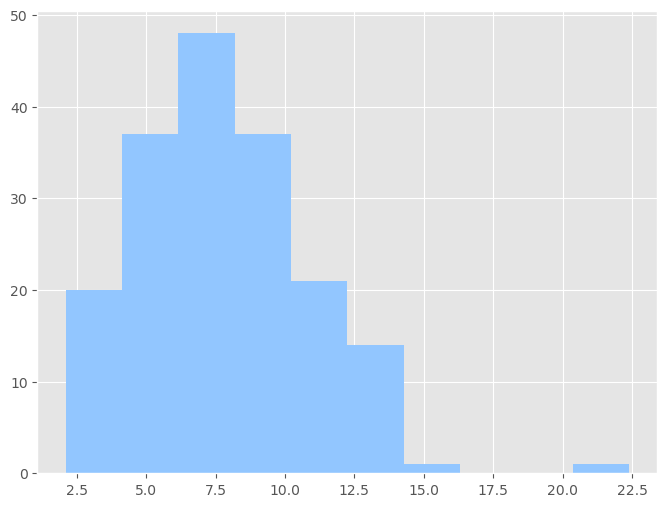

In [100]:
plt.style.use('seaborn-pastel')
plt.figure(figsize=(8, 6))
evdata['Acceleration'].hist()


In [101]:
min_acc_index = evdata['Range'].idxmin()
car_with_min_range = evdata.loc[min_acc_index, 'Name']


max_acc_index = evdata['Range'].idxmax()
car_with_max_range = evdata.loc[max_acc_index, 'Name']

print(f'The maximum range achieved by the car in this dataset is 970 kilometres. Сar with maximum range: {car_with_max_range}')
print(f'On the other hand, the minimum range is significantly lower, at just 95 kilometres. Сar with minimum range: {car_with_min_range}')

The maximum range achieved by the car in this dataset is 970 kilometres. Сar with maximum range: Tesla Roadster 
On the other hand, the minimum range is significantly lower, at just 95 kilometres. Сar with minimum range: Smart EQ fortwo cabrio


In [102]:
top_10 = evdata.sort_values(by='Range', ascending=False).head(30)
bottom_10 = evdata.sort_values(by='Range', ascending=True).head(10)


print("Top 30 cars with the highest range:")
print(top_10[['Name', 'Range']])

print("\nTop 10 cars with the lowest range:")
print(bottom_10[['Name', 'Range']])


Top 30 cars with the highest range:
                                    Name  Range
0                        Tesla Roadster     970
4             Tesla Cybertruck Tri Motor    750
5                Lucid Air Grand Touring    660
58                     Mercedes EQS 450+    640
21               Mercedes EQS 580 4MATIC    610
141                       Lightyear One     575
6               Tesla Model S Long Range    555
20                        Lucid Air Pure    540
11                     Lucid Air Touring    530
27                       BMW iX xDrive50    505
24   Tesla Model 3 Long Range Dual Motor    490
14              Tesla Model X Long Range    475
50                       BMW i4 eDrive40    475
8              Tesla Model 3 Performance    470
41                   Porsche Taycan Plus    460
33           Tesla Cybertruck Dual Motor    460
1                    Tesla Model X Plaid    455
22   Tesla Model 3 Long Range Dual Motor    455
74            CUPRA Born 170 kW - 82 kWh    450
99  

<AxesSubplot:>

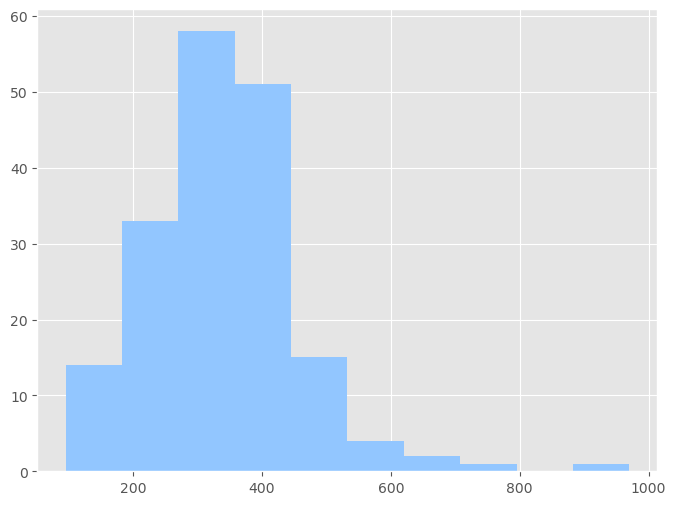

In [103]:
plt.figure(figsize=(8, 6))
evdata['Range'].hist()

In [104]:
min_speed_index = evdata['TopSpeed'].idxmin()
car_with_min_top_speed = evdata.loc[min_speed_index, 'Name']

max_speed_index = evdata['TopSpeed'].idxmax()
car_with_max_top_speed = evdata.loc[max_speed_index, 'Name']

print(f'Maximum top speed of 410 km/h in a {car_with_max_top_speed}')
print(f'Minimum top speed of 123 km/h in a {car_with_min_top_speed}')


Maximum top speed of 410 km/h in a Tesla Roadster 
Minimum top speed of 123 km/h in a Nissan e-NV200 Evalia 


In [105]:
top_10 = evdata.sort_values(by='TopSpeed', ascending=False).head()
bottom_10 = evdata.sort_values(by='TopSpeed', ascending=True).head()


print("Top 5 cars with the highest top speed:")
print(top_10[['Name', 'TopSpeed']])

print("\nTop 5 cars with the lowest top speed:")
print(bottom_10[['Name', 'TopSpeed']])


Top 5 cars with the highest top speed:
                        Name  TopSpeed
0            Tesla Roadster        410
5    Lucid Air Grand Touring       270
1        Tesla Model X Plaid       262
8  Tesla Model 3 Performance       261
2     Porsche Taycan Turbo S       260

Top 5 cars with the lowest top speed:
                          Name  TopSpeed
176     Nissan e-NV200 Evalia        123
177      Dacia Spring Electric       125
178  Renault Kangoo Maxi ZE 33       130
146      Smart EQ fortwo coupe       130
149          Volkswagen e-Up!        130


<AxesSubplot:>

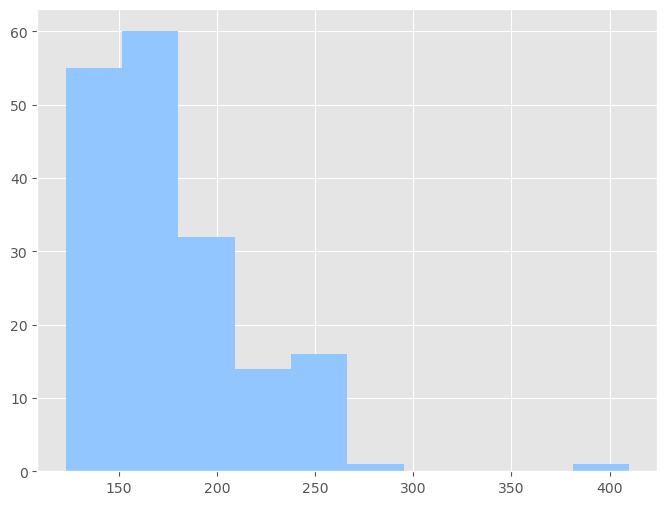

In [106]:
plt.figure(figsize=(8, 6))
evdata['TopSpeed'].hist()

In [107]:
min_price= evdata['PriceinGermany'].idxmin()
car_with_min_price = evdata.loc[min_price,'Name']

max_price = evdata['PriceinGermany'].idxmax()
car_with_max_price = evdata.loc[max_price, 'Name']


print(f'Highest price in Germany of 215,000 (€) in a {car_with_max_price}')
print(f'Lowest price in Germany of 18,460 (€) in a {car_with_min_price}')

Highest price in Germany of 215,000 (€) in a Tesla Roadster 
Lowest price in Germany of 18,460 (€) in a Smart EQ fortwo coupe


In [108]:
top_10 = evdata.sort_values(by='PriceinGermany', ascending=False).head(10)

bottom_10 = evdata.sort_values(by='PriceinGermany', ascending=True).head(10)


print("Top 10 cars with the highest price in Germany:")
print(top_10[['Name', 'PriceinGermany']])

print("\nTop 10 cars with the lowest price in Germany:")
print(bottom_10[['Name', 'PriceinGermany']])


Top 10 cars with the highest price in Germany:
                                     Name  PriceinGermany
0                         Tesla Roadster          215.000
3    Porsche Taycan Turbo S Cross Turismo         187.746
2                  Porsche Taycan Turbo S         186.336
10     Porsche Taycan Turbo Cross Turismo         154.444
7                    Porsche Taycan Turbo         153.016
141                        Lightyear One          149.000
5                 Lucid Air Grand Touring         140.000
9                       Audi e-tron GT RS         138.200
21                Mercedes EQS 580 4MATIC         135.529
1                     Tesla Model X Plaid         116.990

Top 10 cars with the lowest price in Germany:
                           Name  PriceinGermany
146       Smart EQ fortwo coupe           18.46
165           Smart EQ forfour            19.12
177       Dacia Spring Electric           20.49
150      Smart EQ fortwo cabrio           21.72
131  Fiat 500e Hatchback 24 

<AxesSubplot:>

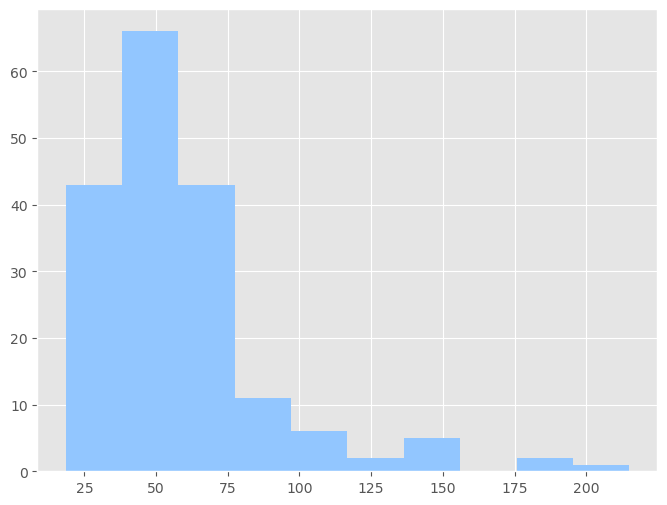

In [109]:
plt.figure(figsize=(8, 6))
evdata['PriceinGermany'].hist()

### Clusterazation


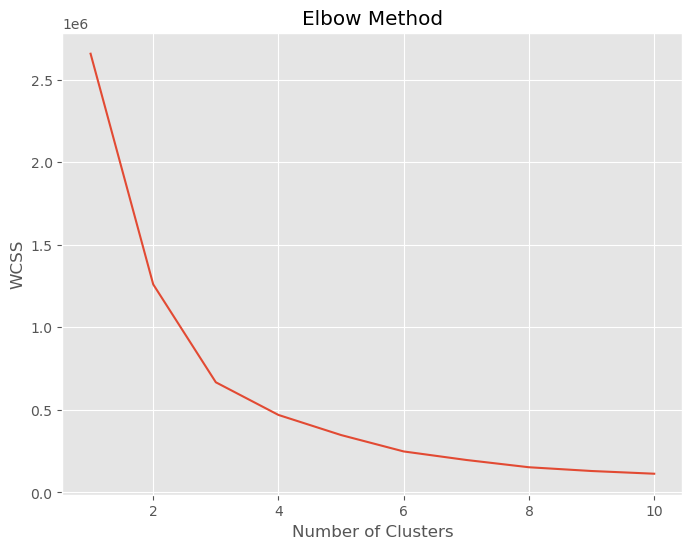

In [110]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


x = evdata.loc[:, ['Range', 'PriceinGermany']].values
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++').fit(x)
    wcss.append(kmeans.inertia_)
    
plt.figure(figsize=(8, 6))
plt.style.use('ggplot')
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

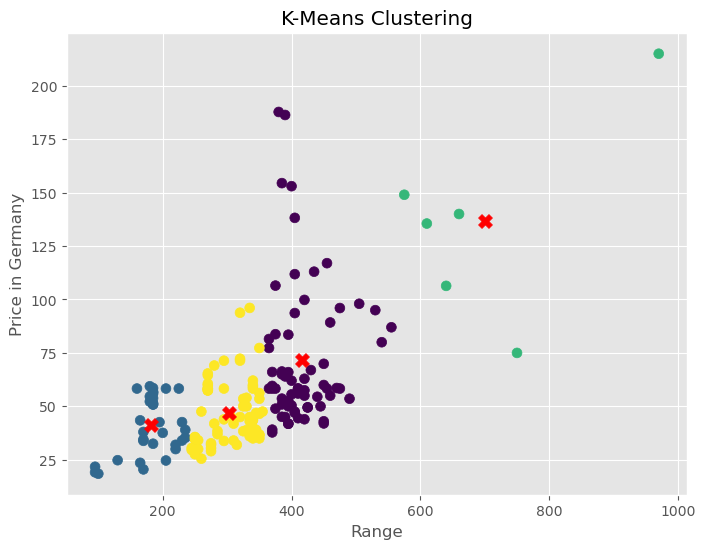

In [111]:
num_clusters = 4  
kmeans = KMeans(n_clusters=num_clusters, init='k-means++')
kmeans.fit(x)

plt.style.use('ggplot')
plt.figure(figsize=(8, 6))


centroids = kmeans.cluster_centers_
labels = kmeans.labels_

plt.scatter(x[:, 0], x[:, 1], c=labels, s=50, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=100, marker='X')
plt.title('K-Means Clustering')
plt.xlabel('Range')
plt.ylabel('Price in Germany')
plt.show()


In [112]:
selected_vehicles = evdata[(evdata['Range'] >= 380) & (evdata['Range'] <= 400) & (evdata['PriceinGermany'] <= 70)]
selected_vehicles[['Name', 'Range', 'PriceinGermany']]

,Name,Range,PriceinGermany
12,Kia EV6 GT,395,65.990
29,Polestar 2 Long Range Dual Motor,395,52.500
34,Nissan Ariya e-4ORCE 87kWh Performance,385,65.000
43,Byton M-Byte 95 kWh 4WD,390,64.000
57,Skoda Enyaq iV RS,395,50.000
59,Audi Q4 e-tron 50 quattro,385,53.600
60,Audi Q4 Sportback e-tron 50 quattro,400,55.600
61,Volkswagen ID.4 GTX,400,50.415
65,BMW iX3,385,66.300
71,Audi Q4 e-tron 45 quattro,385,50.900


### ***Conclusion***

***Blue cluster***  
This cluster includes electric vehicles with relatively low prices and range. These may be more affordable and perhaps more compact models suitable for urban commuting or for buyers on a limited budget.  
***Yellow Cluster***  
For 2023, this seems to be the most common segment, where the average range of a vehicle is about 380 km, and the price is around 45,000 euros. For the majority of people who commute daily, a range of 300-320 km is sufficient for several days' worth of driving. Considering government incentives like a 5,000-euro rebate, this option becomes quite cost-effective. This cluster targets the core market of daily commuters who require a reliable range for regular use.  
***Purple Cluster***  
The average range and price values for the blue cluster indicate that these vehicles offer a significant range (about 420 km on a single charge), which is a strong indicator for the end of 2023. Such a distance allows for comfortable long-distance travel, for example, from Klaipėda to Vilnius or Riga without the need for recharging. Although the average price in this cluster is higher, around 73,000 euros, the blue cluster may represent a market segment that provides the best range-to-price ratio, making it one of the most attractive options for consumers looking for a balance between performance and cost.
This may indicate that manufacturers are focusing their efforts on satisfying the needs of this market segment, offering technologically advanced electric vehicles at competitive prices.
When considering the selection of electric vehicles with a range of 380 to 400 km and a price below 70,000 euros, several models stand out:


| Model                                  | Range | Price (€) |
|----------------------------------------|-------|-----------|
| Kia EV6 GT                             | 395   | 65,990    |
| Polestar 2 Long Range Dual Motor       | 395   | 52,500    |
| Nissan Ariya e-4ORCE 87kWh Performance | 385   | 65,000    |
| Byton M-Byte 95 kWh 4WD                | 390   | 64,000    |
| Skoda Enyaq iV RS                      | 395   | 50,000    |
| Audi Q4 e-tron 50 quattro              | 385   | 53,600    |
| Audi Q4 Sportback e-tron 50 quattro    | 400   | 55,600    |
| Volkswagen ID.4 GTX                    | 400   | 50,415    |
| BMW iX3                                | 385   | 66,300    |
| Audi Q4 e-tron 45 quattro              | 385   | 50,900    |
| Tesla Cybertruck Single Motor          | 390   | 45,000    |
| Hyundai IONIQ 5 Long Range 2WD         | 385   | 45,100    |
| Byton M-Byte 95 kWh 2WD                | 400   | 62,000    |
| Hyundai Kona Electric 64 kWh           | 395   | 41,850    |
| Hyundai Kona Electric 64 kWh           | 395   | 41,850    |


The Kia EV6 GT and Skoda Enyaq iV RS offer an impressive range of 395 km at competitive prices at the higher and lower ends of the spectrum, respectively. These models serve as prime examples of how modern electric vehicles are not only pushing the boundaries of range but also becoming more accessible in terms of price.  
The Nissan Ariya e-4ORCE 87kWh Performance is a bright example of the convergence of European price sensitivity with Japanese manufacturing expertise. With a range of 385 km and priced at 65,000 euros, it will attract customers who value quality and reliability without compromising on range.  
The Audi Q4 e-tron series, including the standard model and the Sportback version, as well as the Volkswagen ID.4 GTX, are options for those who lean towards German engineering and design, with the added benefit of a substantial range.
Hyundai Kona Electric 64 kWh shows that even at a lower price point, around 42,000 euros, one can still enjoy a considerable range, indicating that the EV market is expanding to cater to a wider audience.  
Finally, the BMW iX3 echoes the premium segment's move towards more sustainable models, offering a significant range of 385 km for enthusiasts of German car brands.  
***Green Cluster***  
This cluster includes vehicles with high ranges but variable pricing. It suggests a segment of high-performance electric vehicles available in different price categories, with a tendency towards more expensive models. These might cater to consumers who prioritize range and are willing to invest more for long-distance capability and possibly more luxury features.  
**Conclusion**  
From this analysis, it becomes clear that each cluster serves different consumer needs and preferences. The green cluster caters to cost-conscious urban commuters, the purple cluster appeals to regular commuters seeking cost efficiency and reliable range, and the blue cluster attracts those looking for premium features, long range, and are willing to pay a higher price for these advantages.

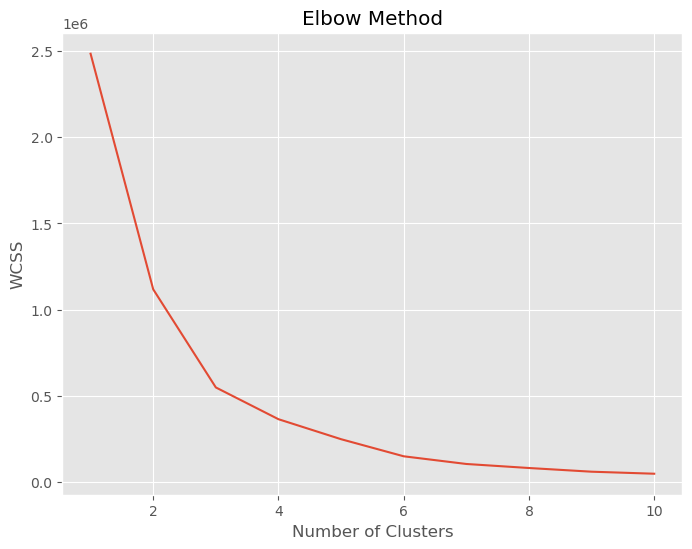

In [113]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


x = evdata.loc[:, ['Range', 'Acceleration']].values
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++').fit(x)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.style.use('ggplot')
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

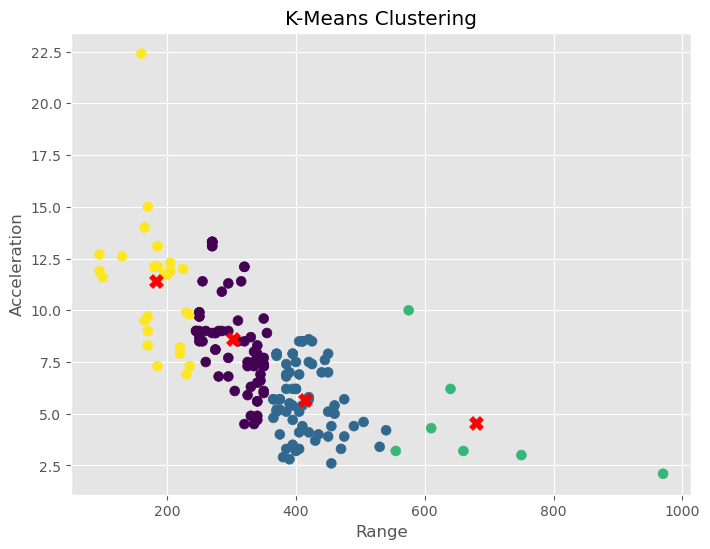

In [114]:
num_clusters = 4  
kmeans = KMeans(n_clusters=num_clusters, init='k-means++')
kmeans.fit(x)

plt.style.use('ggplot')
plt.figure(figsize=(8, 6))


centroids = kmeans.cluster_centers_
labels = kmeans.labels_

plt.scatter(x[:, 0], x[:, 1], c=labels, s=50, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=100, marker='X')
plt.title('K-Means Clustering')
plt.xlabel('Range')
plt.ylabel('Acceleration')
plt.show()

### ***Conclusion***

***Yellow Cluste*** represents the entry-level segment of electric vehicles with limited range and acceleration. It is ideally suited for urban dwellers and those looking for an economical option for short commutes.  
***Purple Cluster*** combines moderate range and acceleration, making it attractive to a broad consumer base. Manufacturers can use this analysis to optimize the balance between cost and performance, aiming for the ideal combination for daily drivers.  
***Blue cluster*** features vehicles with good acceleration and range, likely corresponding to mid-tier high-performance models. Manufacturers in this cluster may aim to improve performance and extend range while maintaining affordability.  
***Green Cluster*** encompasses the premium segment with excellent acceleration and range. Manufacturers in this segment can focus on innovations, including advanced battery technologies and electric motors, as well as enhancing overall driving experience and comfort to meet the demands of more discerning customers.

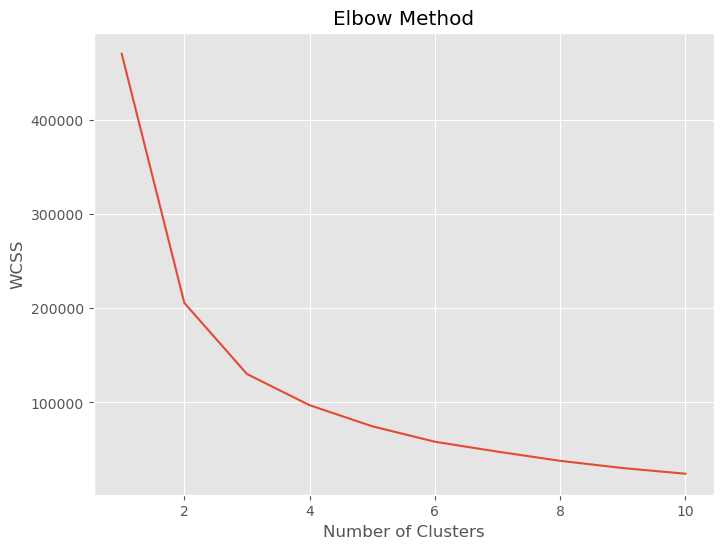

In [115]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


x = evdata.loc[:, ['TopSpeed', 'PriceinGermany']].values
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++').fit(x)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.style.use('ggplot')
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

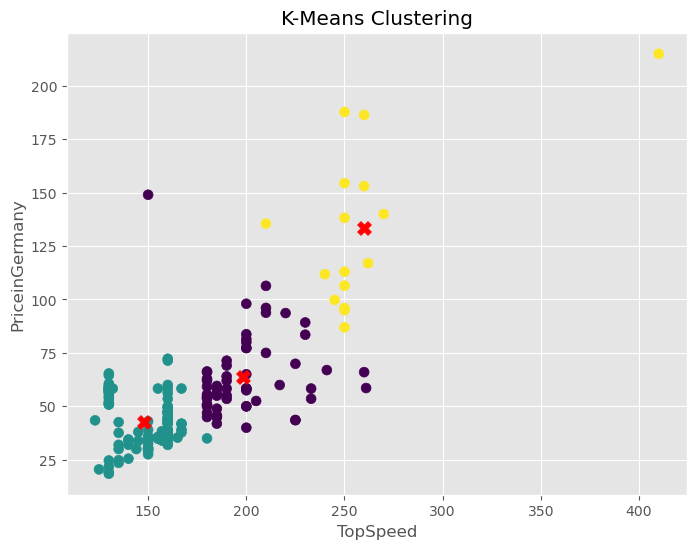

In [116]:
num_clusters =  3 
kmeans = KMeans(n_clusters=num_clusters, init='k-means++')
kmeans.fit(x)

plt.style.use('ggplot')
plt.figure(figsize=(8, 6))


centroids = kmeans.cluster_centers_
labels = kmeans.labels_

plt.scatter(x[:, 0], x[:, 1], c=labels, s=50, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=100, marker='X')
plt.title('K-Means Clustering')
plt.xlabel('TopSpeed')
plt.ylabel('PriceinGermany')
plt.show()

### **Conclusion**

Top speed has traditionally been a measure of a car's performance. However, its importance may be overstated for electric vehicles due to the efficiency limitations of battery use at high speeds. This is particularly relevant considering that most electric vehicle users drive in urban and suburban conditions, where the need for top speed is rare.  
Manufacturers can use this information to understand the current position of their products in comparison with competitors and to identify potential market niches. For example, if the goal was to attract attention to powerful yet affordable cars, the **purple cluster** would be well suited for such analysis. For the premium segment, indicated by the **yellow cluster**, key improvements could be made in interior design and technology to justify a higher price. Manufacturers might also consider expanding the range of top speeds to attract customers looking for exclusive or sporty characteristics.